In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('full_data.csv')

In [3]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
41783,2020-09-03,Zimbabwe,79.0,3.0,6638.0,206.0,387.0,27.0,995.0,56.0
41784,2020-09-04,Zimbabwe,40.0,0.0,6678.0,206.0,386.0,17.0,933.0,55.0
41785,2020-09-05,Zimbabwe,159.0,0.0,6837.0,206.0,449.0,11.0,1022.0,54.0
41786,2020-09-06,Zimbabwe,0.0,0.0,6837.0,206.0,431.0,10.0,944.0,53.0


In [4]:
df.head(5)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df=df.loc[df["location"].isin(["India"])]

In [6]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
17521,2019-12-31,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
17522,2020-01-01,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
17523,2020-01-02,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
17524,2020-01-03,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
17525,2020-01-04,India,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17768,2020-09-03,India,83883.0,1043.0,3853406.0,67376.0,543172.0,6904.0,1016481.0,13510.0
17769,2020-09-04,India,83341.0,1096.0,3936747.0,68472.0,549247.0,6943.0,1030924.0,13623.0
17770,2020-09-05,India,86432.0,1089.0,4023179.0,69561.0,559207.0,7011.0,1047478.0,13767.0
17771,2020-09-06,India,90632.0,1065.0,4113811.0,70626.0,571078.0,7128.0,1068871.0,13920.0


In [7]:
df=df[["location","total_cases"]]

In [8]:
df

,location,total_cases
17521,India,0.0
17522,India,0.0
17523,India,0.0
17524,India,0.0
17525,India,0.0
...,...,...
17768,India,3853406.0
17769,India,3936747.0
17770,India,4023179.0
17771,India,4113811.0


In [9]:
df.tail()

,location,total_cases
17768,India,3853406.0
17769,India,3936747.0
17770,India,4023179.0
17771,India,4113811.0
17772,India,4204613.0


In [10]:
import matplotlib.pyplot as plt

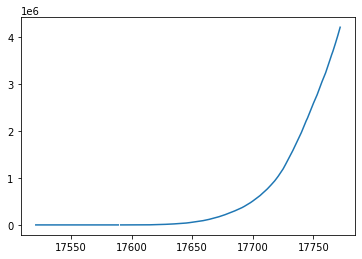

In [11]:
plt.plot(df["total_cases"])
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [17]:
import numpy as np
df=df.dropna()
df=df.reset_index()
X=np.array(df["index"]).reshape(-1,1)
Y=np.array(df["total_cases"]).reshape(-1,1)
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X,Y)
lin_reg.score(X,Y)

0.9938228829309742

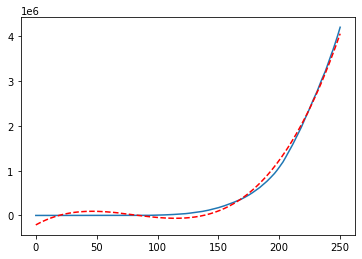

In [18]:
plt.plot(df["total_cases"])
plt.plot(lin_reg.predict(X),"r--")
plt.show()

In [21]:
lin_reg.predict(poly.fit_transform([[247]]))

array([[-4.91934329e+12]])